### Import libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn import metrics

In [42]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Load data

In [43]:
house=pd.read_csv('/Users/guyuhui/Desktop/kc_house_data.csv')

In [44]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000000,3,1.000000,1180,5650,1.000000,0,0,...,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650
1,6414100192,20141209T000000,538000.000000,3,2.250000,2570,7242,2.000000,0,0,...,7,2170,400,1951,1991,98125,47.721000,-122.319000,1690,7639
2,5631500400,20150225T000000,180000.000000,2,1.000000,770,10000,1.000000,0,0,...,6,770,0,1933,0,98028,47.737900,-122.233000,2720,8062
3,2487200875,20141209T000000,604000.000000,4,3.000000,1960,5000,1.000000,0,0,...,7,1050,910,1965,0,98136,47.520800,-122.393000,1360,5000
4,1954400510,20150218T000000,510000.000000,3,2.000000,1680,8080,1.000000,0,0,...,8,1680,0,1987,0,98074,47.616800,-122.045000,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000000,3,2.500000,1530,1131,3.000000,0,0,...,8,1530,0,2009,0,98103,47.699300,-122.346000,1530,1509
21609,6600060120,20150223T000000,400000.000000,4,2.500000,2310,5813,2.000000,0,0,...,8,2310,0,2014,0,98146,47.510700,-122.362000,1830,7200
21610,1523300141,20140623T000000,402101.000000,2,0.750000,1020,1350,2.000000,0,0,...,7,1020,0,2009,0,98144,47.594400,-122.299000,1020,2007
21611,291310100,20150116T000000,400000.000000,3,2.500000,1600,2388,2.000000,0,0,...,8,1600,0,2004,0,98027,47.534500,-122.069000,1410,1287


In [45]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

After observing the dataset, we notice that the data is clean and no nulls exist in the dataset. It has 21613 rows of house price data. When performing future engineering, the date should be changed to a DateTime object, which makes it easier to extract the month of sale. Also, there are no categorical variables, thus we don't need to handle dummy variables in the later process.

### Data cleaning

In [46]:
# drop 'id' because it is not useful for our analysis
house.drop('id', axis = 1, inplace = True)

In [47]:
# check duplicates
duplicates = house[house.duplicated()]
print(len(duplicates))

0


In [48]:
#delete unnecessary column
del house['lat']
del house['long']
del house['zipcode']


In [49]:
# check missing value
house.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [50]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,1800,7503


After cleaning the data, it is good to see is no duplicates and missing value in the dataset. Then we can drop the `id`, `lat`, `long` and `zipcode` because it is not useful for our analysis.

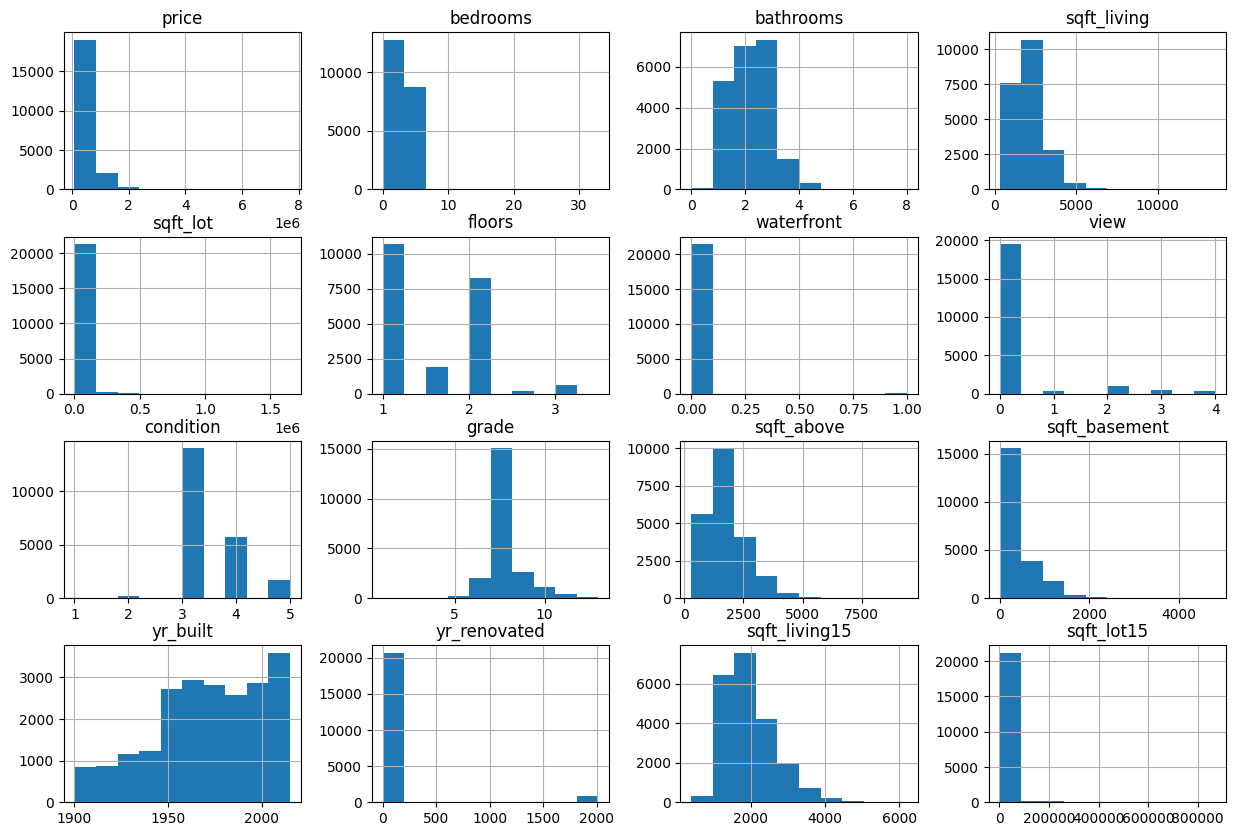

In [51]:
# check outliers
house.hist(figsize = (15,10))
plt.show()

In [52]:
house.describe(include = 'all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,NaN,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,NaN,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,NaN,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,NaN,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,NaN,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000


Notice that `grade`, `condition` and `floors` appear to be on a reasonable scale with no apparent outliers. Since we want to investigate the features that predict `price`, therefore we can consider potential outliers in `bedrooms`, `bathrooms` and the `sqft-type` features because these features seem to be the key factors affecting housing prices and these features distributed in a very wide range, which may be one of the reasons that price varies in a wide range as well.

<Axes: ylabel='bedrooms'>

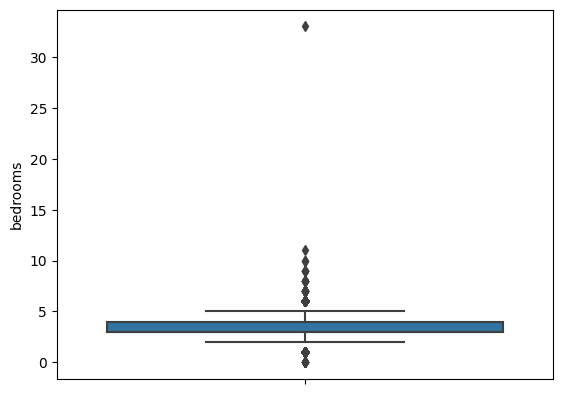

In [53]:
# use boxplot to check outliers
sns.boxplot(data = house, y='bedrooms')

In [54]:
house['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [55]:
# Find index values of observations above 15
drop_price_outliers = house[house['bedrooms']>15].index
drop_price_outliers

Index([15870], dtype='int64')

In [56]:
house.drop(drop_price_outliers, inplace=True)

In [57]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21612 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21612 non-null  object 
 1   price          21612 non-null  float64
 2   bedrooms       21612 non-null  int64  
 3   bathrooms      21612 non-null  float64
 4   sqft_living    21612 non-null  int64  
 5   sqft_lot       21612 non-null  int64  
 6   floors         21612 non-null  float64
 7   waterfront     21612 non-null  int64  
 8   view           21612 non-null  int64  
 9   condition      21612 non-null  int64  
 10  grade          21612 non-null  int64  
 11  sqft_above     21612 non-null  int64  
 12  sqft_basement  21612 non-null  int64  
 13  yr_built       21612 non-null  int64  
 14  yr_renovated   21612 non-null  int64  
 15  sqft_living15  21612 non-null  int64  
 16  sqft_lot15     21612 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 3.0+ 

### Feature engineering

In [58]:
# Transform date to a date data format
house['date'] = pd.to_datetime(house['date'])

In [59]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,2014-10-13,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,1340,5650
1,2014-12-09,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,1690,7639
2,2015-02-25,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,2720,8062
3,2014-12-09,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,1360,5000
4,2015-02-18,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,1800,7503


In [60]:
# Create function to classify price
def total_price(x):
    if x >= 0 and x < 200000:
        return 'below 200000'
    elif x >= 200000 and x < 500000:
        return '200000-500000'
        return '10-50'
    elif x >= 500000 and x < 1000000:
        return '500000-1000000'
    else:
        return '1000000+'

In [61]:
# Create new column with price count range using function created above
house['price_group'] = house['price'].apply(total_price)

In [62]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price_group
0,2014-10-13,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,1340,5650,200000-500000
1,2014-12-09,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,1690,7639,500000-1000000
2,2015-02-25,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,2720,8062,below 200000
3,2014-12-09,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,1360,5000,500000-1000000
4,2015-02-18,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,1800,7503,500000-1000000


In [63]:
# Get summary for 'bathroom '
house['bathrooms'].describe()

count   21612.000000
mean        2.114774
std         0.770177
min         0.000000
25%         1.750000
50%         2.250000
75%         2.500000
max         8.000000
Name: bathrooms, dtype: float64

In [64]:
# Round 'bathroom' to interger
def round_bathrooms(house):
    house['bathrooms'] = house['bathrooms'].map(lambda x: int(round(x,0)))
    return house

house = round_bathrooms(house)

In [65]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price_group
0,2014-10-13,221900.000000,3,1,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,1340,5650,200000-500000
1,2014-12-09,538000.000000,3,2,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,1690,7639,500000-1000000
2,2015-02-25,180000.000000,2,1,770,10000,1.000000,0,0,3,6,770,0,1933,0,2720,8062,below 200000
3,2014-12-09,604000.000000,4,3,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,1360,5000,500000-1000000
4,2015-02-18,510000.000000,3,2,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,1800,7503,500000-1000000


### Linear regrssion

In [66]:
# separate features and target
categorical_features = ['grade','condition']
numerical_features = ['sqft_living','bathrooms', 'bedrooms']
target = 'price'

In [67]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(house[categorical_features + numerical_features]
                                                    ,house[target],
                                                    test_size = 0.3, random_state=1234)

In [68]:
# Create the Scaler object
std_scaler = preprocessing.MinMaxScaler()

# apply the transformation to the training data
x_train_std = std_scaler.fit_transform(X_train) 

# apply the transformation to the testing data
x_test_std = std_scaler.transform(X_test) # but we only transform our testing data with already fit scaler

# convert resulting array back to dataframe
x_test_std_df = pd.DataFrame(x_test_std, columns = X_train.columns)

x_test_std_df.head()

,grade,condition,sqft_living,bathrooms,bedrooms
0,0.583333,0.750000,0.131321,0.250000,0.272727
1,0.583333,0.500000,0.167547,0.250000,0.272727
2,0.833333,0.500000,0.252075,0.375000,0.454545
3,0.500000,0.750000,0.103396,0.125000,0.272727
4,0.583333,0.500000,0.131321,0.250000,0.363636


In [69]:
house[['condition', 'grade','sqft_living','bathrooms','bedrooms']]

,condition,grade,sqft_living,bathrooms,bedrooms
0,3,7,1180,1,3
1,3,7,2570,2,3
2,3,6,770,1,2
3,5,7,1960,3,4
4,3,8,1680,2,3
...,...,...,...,...,...
21608,3,8,1530,2,3
21609,3,8,2310,2,4
21610,3,7,1020,1,2
21611,3,8,1600,2,3


In [108]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [109]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [110]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [111]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bathrooms',
                                                   'bedrooms'])])),
                ('regressor', LinearRegression())])

In [113]:
pred = linear_regression.predict(X_test)

In [114]:
pred

array([ 563853.79354394,  581484.27323389, 1307312.94748118, ...,
        584685.782316  ,  555737.2756812 ,  762491.81722802])

In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
linear_mse =np.sqrt(mean_squared_error(pred,y_test))
linear_mse

233787.82960556963

In [120]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [121]:
print('Intercept: {}'.format(linear_model.intercept_))
print('Columns: {}'.format(X_train.columns))
print('Coefficients: {}'.format(linear_model.coef_))

Intercept: -723133.6568932305
Columns: Index(['grade', 'condition', 'sqft_living', 'bathrooms', 'bedrooms'], dtype='object')
Coefficients: [ 97152.13906098  65459.60566412    208.22882668  18950.62456133
 -52326.56068874]


In [122]:
# Return the coefficient of determination R^2 of the prediction.
linear_score = linear_regression.score(X_train, y_train)
linear_score

0.5999997730552169

In [124]:
# Use the scaled test data to generate the prediction price
y_pred_linear = linear_model.predict(X_test)

In [127]:
# Calculate the mean-squared error
linear_mse = metrics.mean_squared_error(y_test, y_pred_linear)
linear_mse

59136908216.86154

## Ridge

In [79]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [80]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bathrooms',
                                                   'bedrooms'])])),
                ('regressor', Ridge(alpha=3.0))])

In [81]:
pred_ridge = ridge_regression.predict(X_test)

In [82]:
ridge_mse = np.sqrt(mean_squared_error(pred_ridge,y_test))
ridge_mse

233791.06270980704

In [129]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [130]:
print('Intercept: {}'.format(ridge_model.intercept_))
print('Columns: {}'.format(X_train.columns))
print('Coefficients: {}'.format(ridge_model.coef_))

Intercept: -723032.0196949227
Columns: Index(['grade', 'condition', 'sqft_living', 'bathrooms', 'bedrooms'], dtype='object')
Coefficients: [ 97140.53135706  65446.7457803     208.2387269   18946.34111781
 -52320.80471471]


In [131]:
# Return the coefficient of determination R^2 of the prediction.
ridge_score = ridge_model.score(X_train, y_train)
ridge_score

0.5552204196635593

In [132]:
# Use the scaled test data to generate the prediction price
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the mean-squared error
ridge_mse = metrics.mean_squared_error(y_test, y_pred_ridge)
ridge_mse

59136977034.48279

## Lasso

In [83]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [84]:
lasso_regression.fit(X_train, y_train)

/Users/guyuhui/micromamba/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 923532080763.25, tolerance: 203748092968.93378
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bathrooms',
                                                   'bedrooms'])])),
                ('regressor', Lasso())])

In [85]:
lasso_pred = lasso_regression.predict(X_test)

In [86]:
lasso_mse = np.sqrt(mean_squared_error(lasso_pred, y_test))
lasso_mse

233785.8956861114

In [133]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [134]:
print('Intercept: {}'.format(lasso_model.intercept_))
print('Columns: {}'.format(X_train.columns))
print('Coefficients: {}'.format(lasso_model.coef_))

Intercept: -723116.6991665838
Columns: Index(['grade', 'condition', 'sqft_living', 'bathrooms', 'bedrooms'], dtype='object')
Coefficients: [ 97150.67356366  65456.6890952     208.23105547  18946.79302123
 -52324.34348628]


In [135]:
# Return the coefficient of determination R^2 of the prediction.
lasso_score = lasso_model.score(X_train, y_train)
lasso_score

0.5552204207402645

In [136]:
# Use the scaled test data to generate the prediction price
y_pred_lasso = lasso_model.predict(X_test)

# Calculate the mean-squared error
lasso_mse = metrics.mean_squared_error(y_test, y_pred_lasso)
lasso_mse

59136938835.95094

## Results

In [87]:
pd.set_option('display.float_format', '{:.6f}'.format)
pd.DataFrame([[linear_mse, ridge_mse, lasso_mse]], 
             columns= ['Simple Linear Regression', 'Ridge Regression', 'Lasso Regression'],
             index = ['MSE'])

,Simple Linear Regression,Ridge Regression,Lasso Regression
MSE,233787.829606,233791.062710,233785.895686


In [142]:
pd.set_option('display.float_format', '{:.2f}'.format)

# Convert coefficients and other variables to lists
coef_results = pd.DataFrame(
    list(zip(
        list(X_train.columns),
        list(np.transpose(linear_model.coef_)),
        list(np.transpose(ridge_model.coef_)),
        list(np.transpose(lasso_model.coef_))
    )),
    columns=['features', 'Simple Linear Regression', 'Ridge Regression', 'Lasso Regression']
)

# Set 'features' column as the index
coef_results = coef_results.set_index('features')

# Display the coefficient results
coef_results

,Simple Linear Regression,Ridge Regression,Lasso Regression
features,,,
grade,97152.14,97140.53,97150.67
condition,65459.61,65446.75,65456.69
sqft_living,208.23,208.24,208.23
bathrooms,18950.62,18946.34,18946.79
bedrooms,-52326.56,-52320.80,-52324.34


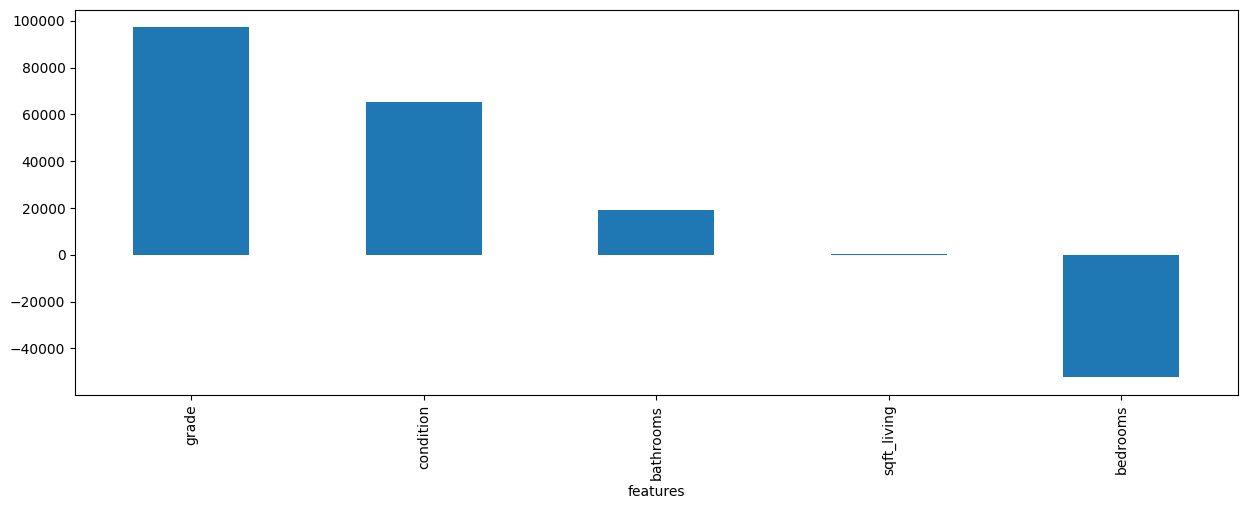

In [143]:
coef_results['Lasso Regression'].sort_values(ascending = False).plot.bar(figsize=(15,5),)
plt.show()

In [ ]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [ ]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bathrooms',
                                                   'bedrooms'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [ ]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

255158.23342003924

In [ ]:
y_test

12432     485000.0
7793      358000.0
13435     716500.0
1821      367500.0
12449     544000.0
           ...    
2596     1065000.0
21161     459990.0
20133     388500.0
11130     530000.0
16763     829000.0
Name: price, Length: 6484, dtype: float64

In [ ]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [ ]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']

In [ ]:
X_test

,grade,condition,sqft_living,bathrooms,bedrooms
12432,8,4,2030,2,3
7793,8,3,2510,2,3
13435,11,3,3630,3,5
1821,7,4,1660,1,3
12449,8,3,2030,2,4
...,...,...,...,...,...
2596,8,3,1890,2,2
21161,8,3,2680,2,3
20133,8,3,2718,2,4
11130,8,4,1980,2,3


In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)
pd.DataFrame([[linear_score, ridge_score, lasso_score],[linear_mse, ridge_mse, lasso_mse]], 
             columns= ['Simple Linear Regression', 'Ridge Regression', 'Lasso Regression'],
             index = ['Score', 'MSE'])